  ## Project :- Customer Classification using Logistic Regression

#### Problem Statement: Depending on the Revenue Grid, identify if the customer is High Net Worth or Low Net Worth

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve  

In [4]:
data=pd.read_csv("existing_base_train.csv")

In [5]:
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [7]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [8]:
data['Average_Credit_Card_Transaction'].max()

662.26

##### Exploratory Data Analaysis

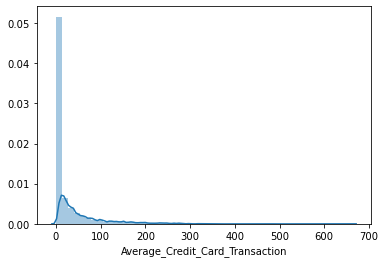

In [615]:
sns.distplot(data['Average_Credit_Card_Transaction'])

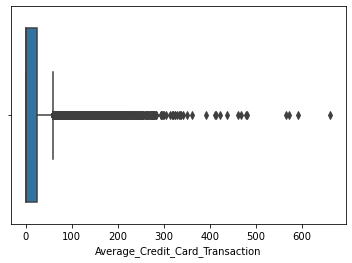

In [616]:
sns.boxplot(data['Average_Credit_Card_Transaction'])

In [617]:
data['Average_Credit_Card_Transaction'].mean()

23.25109428852797

In [618]:
data['Average_Credit_Card_Transaction'].median()

0.0

In [619]:
data['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [620]:
data['Personal_Loan'].max()

4905.93

In [621]:
data['children'].unique()

array(['2', 'Zero', '1', '3', '4+'], dtype=object)

In [622]:
data['age_band'].unique()

array(['31-35', '45-50', '36-40', '55-60', '61-65', '65-70', '41-45',
       '51-55', '26-30', '22-25', '71+', 'Unknown', '18-21'], dtype=object)

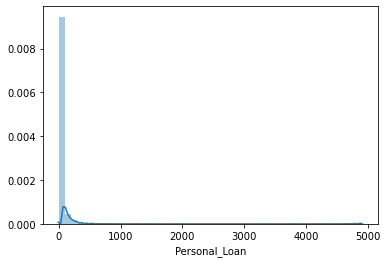

In [623]:
sns.distplot(data['Personal_Loan'])

In [624]:
data['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [625]:
data['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

In [626]:
data[data['occupation']=='Retired'].count()['occupation']

1799

In [627]:
data[data['occupation']=='Housewife'].count()['occupation']

984

In [628]:
data[data['occupation']=='Professional'].count()['occupation']

1949

In [629]:
data[data['family_income']=='Unknown'].count()['family_income']

108

In [630]:
data['family_income'].unique()

array(['>=35,000', '<22,500, >=20,000', '<25,000, >=22,500',
       '<30,000, >=27,500', '<20,000, >=17,500', '<27,500, >=25,000',
       '< 4,000', '<15,000, >=12,500', '<17,500, >=15,000',
       '< 8,000, >= 4,000', '<12,500, >=10,000', '<10,000, >= 8,000',
       'Unknown'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labelencoder=LabelEncoder()

In [11]:
data["children_n"]=labelencoder.fit_transform(data["children"])

In [12]:
data["age_band_n"]=labelencoder.fit_transform(data["age_band"])

In [13]:
data["status_n"]=labelencoder.fit_transform(data["status"])

In [14]:
data["occupation_n"]=labelencoder.fit_transform(data["occupation"])

In [15]:
data["home_status_n"]=labelencoder.fit_transform(data["home_status"])

In [16]:
data["family_income_n"]=labelencoder.fit_transform(data["family_income"])

In [17]:
data["self_employed_n"]=labelencoder.fit_transform(data["self_employed"])

In [18]:
data["self_employed_partner_n"]=labelencoder.fit_transform(data["self_employed_partner"])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [20]:
data.valuecounts()

AttributeError: 'DataFrame' object has no attribute 'valuecounts'

In [ ]:
data["TVarea_n"]=labelencoder.fit_transform(data["TVarea"])

In [ ]:
data["post_code_n"]=labelencoder.fit_transform(data["post_code"])

In [ ]:
data["post_area_n"]=labelencoder.fit_transform(data["post_area"])

In [22]:
data["gender_n"]=labelencoder.fit_transform(data["gender"])

In [23]:
data["region_n"]=labelencoder.fit_transform(data["region"])

In [24]:
data.drop('children', axis=1, inplace=True)

In [25]:
data.drop('age_band', axis=1, inplace=True)

In [26]:
data.drop('status', axis=1, inplace=True)

In [27]:
data.drop('occupation', axis=1, inplace=True)

In [28]:
data.drop('occupation_partner', axis=1, inplace=True)

In [29]:
data.drop('home_status', axis=1, inplace=True)

In [30]:
data.drop('family_income', axis=1, inplace=True)

In [31]:
data.drop('self_employed', axis=1, inplace=True)

In [32]:
data.drop('self_employed_partner', axis=1, inplace=True)

In [33]:
data.drop('TVarea', axis=1, inplace=True)

In [34]:
data.drop('post_code', axis=1, inplace=True)

In [35]:
data.drop('post_area', axis=1, inplace=True)

In [36]:
data.drop('gender', axis=1, inplace=True)

In [37]:
data.drop('region', axis=1, inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   year_last_moved                  8124 non-null   int64  
 2   Average_Credit_Card_Transaction  8124 non-null   float64
 3   Balance_Transfer                 8124 non-null   float64
 4   Term_Deposit                     8124 non-null   float64
 5   Life_Insurance                   8124 non-null   float64
 6   Medical_Insurance                8124 non-null   float64
 7   Average_A/C_Balance              8124 non-null   float64
 8   Personal_Loan                    8124 non-null   float64
 9   Investment_in_Mutual_Fund        8124 non-null   float64
 10  Investment_Tax_Saving_Bond       8124 non-null   float64
 11  Home_Loan                        8124 non-null   float64
 12  Online_Purchase_Amou

In [39]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,...,children_n,age_band_n,status_n,occupation_n,home_status_n,family_income_n,self_employed_n,self_employed_partner_n,gender_n,region_n
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,...,2.710980,5.784712,1.236583,4.000985,1.099089,7.306253,0.071516,0.112875,0.252216,7.126908
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,...,1.684063,2.767543,0.841003,2.090115,0.461124,3.439995,0.257701,0.316460,0.443011,3.031456
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,5.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,...,4.000000,6.000000,1.000000,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,8.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,...,4.000000,8.000000,1.000000,5.000000,1.000000,11.000000,0.000000,0.000000,0.000000,9.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,...,4.000000,12.000000,4.000000,8.000000,4.000000,12.000000,1.000000,1.000000,2.000000,12.000000


### Machine Learning Model using Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop('Revenue_Grid',axis = 1)
y = data['Revenue_Grid']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,stratify=y)

In [665]:
X_train

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,...,occupation_n,home_status_n,family_income_n,self_employed_n,self_employed_partner_n,TVarea_n,post_code_n,post_area_n,gender_n,region_n
7273,10117,1976,0.00,0.00,0.00,15.49,33.96,35.41,0.00,33.97,...,5,1,5,0,0,5,6595,1559,0,5
5778,4850,1995,0.00,19.99,0.00,51.47,0.00,34.48,0.00,27.48,...,2,1,4,0,0,0,4733,1108,0,8
4649,5901,1971,39.99,0.00,49.48,0.00,0.00,9.98,0.00,37.98,...,5,1,7,0,0,5,4483,1060,0,5
7013,11115,1990,0.00,0.00,0.00,0.00,9.98,19.44,20.49,0.00,...,2,3,4,1,0,7,668,160,1,8
6097,7080,1988,0.00,39.49,0.00,25.99,11.98,51.36,0.00,51.45,...,6,1,3,0,0,6,5297,1241,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,3642,1995,0.00,34.99,58.97,72.47,19.49,0.00,151.37,119.47,...,6,1,7,0,0,10,4874,1155,0,4
3503,691,1986,24.99,124.49,34.49,0.00,72.88,22.95,0.00,56.95,...,5,1,4,0,0,6,4138,995,0,11
7303,2012,1986,168.95,24.99,0.00,131.45,14.48,9.97,0.00,0.00,...,6,1,8,0,1,9,7179,1744,0,9
1097,9689,1968,11.99,0.00,101.94,98.46,64.93,55.96,0.00,0.00,...,5,1,4,0,0,6,2617,660,0,9


In [666]:
X_train.isnull().count()

REF_NO                             6093
year_last_moved                    6093
Average_Credit_Card_Transaction    6093
Balance_Transfer                   6093
Term_Deposit                       6093
Life_Insurance                     6093
Medical_Insurance                  6093
Average_A/C_Balance                6093
Personal_Loan                      6093
Investment_in_Mutual_Fund          6093
Investment_Tax_Saving_Bond         6093
Home_Loan                          6093
Online_Purchase_Amount             6093
Investment_in_Commudity            6093
Investment_in_Equity               6093
Investment_in_Derivative           6093
Portfolio_Balance                  6093
children_n                         6093
age_band_n                         6093
status_n                           6093
occupation_n                       6093
home_status_n                      6093
family_income_n                    6093
self_employed_n                    6093
self_employed_partner_n            6093


In [667]:
y_train

7273    2
5778    2
4649    2
7013    2
6097    2
       ..
6511    2
3503    2
7303    1
1097    1
4873    2
Name: Revenue_Grid, Length: 6093, dtype: int64

In [668]:
y_test

7844    2
1614    2
952     2
7285    2
4146    2
       ..
348     2
3614    2
4038    2
5608    2
8114    1
Name: Revenue_Grid, Length: 2031, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [671]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6093 entries, 7273 to 4873
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           6093 non-null   int64  
 1   year_last_moved                  6093 non-null   int64  
 2   Average_Credit_Card_Transaction  6093 non-null   float64
 3   Balance_Transfer                 6093 non-null   float64
 4   Term_Deposit                     6093 non-null   float64
 5   Life_Insurance                   6093 non-null   float64
 6   Medical_Insurance                6093 non-null   float64
 7   Average_A/C_Balance              6093 non-null   float64
 8   Personal_Loan                    6093 non-null   float64
 9   Investment_in_Mutual_Fund        6093 non-null   float64
 10  Investment_Tax_Saving_Bond       6093 non-null   float64
 11  Home_Loan                        6093 non-null   float64
 12  Online_Purchase_A

In [49]:
logmodel.fit(X_train, y_train)

D:\Shraddha-study\DS\MYAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#predicting on train data
y_pred_train = logmodel.predict(X_train)

#predicting on test data
y_pred_test = logmodel.predict(X_test)

In [52]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Low Net','Actual High Net']
confusion_matrix.columns = ['Predicted Low Net','Predicted High Net']
print(confusion_matrix)

                 Predicted Low Net  Predicted High Net
Actual Low Net                 137                  78
Actual High Net                 30                1786


In [53]:
pred31 = logmodel.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred31))

Accuracy score for test data is: 0.946824224519941


In [54]:
predictions = logmodel.predict(X_test)

In [55]:
predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [675]:
len(predictions)

2031

In [676]:
len(X_test)

2031

In [677]:
len(y_test)

2031

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.82      0.64      0.72       215
           2       0.96      0.98      0.97      1816

    accuracy                           0.95      2031
   macro avg       0.89      0.81      0.84      2031
weighted avg       0.94      0.95      0.94      2031



In [59]:
AA=X_test["REF_NO"]

In [60]:
AA

6112     4576
3816     1741
5631    10521
2128     1027
6119     2602
        ...  
2920     5869
3805     7245
2107     6970
5930     1567
3760     3740
Name: REF_NO, Length: 2031, dtype: int64

In [61]:
len(AA)

2031

In [62]:
predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [63]:
pred1=pd.DataFrame(predictions)

In [64]:
pred1.sample(20)

,0
709,2
1416,2
1886,2
1324,2
236,2
493,2
1435,2
1087,2
398,1
1603,1


In [65]:
len(pred1)

2031

In [66]:
result10 = pd.concat([AA.reset_index(), pred1.reset_index()], axis = 1)

In [67]:
result10

,index,REF_NO,index,0
0,6112,4576,0,2
1,3816,1741,1,2
2,5631,10521,2,2
3,2128,1027,3,2
4,6119,2602,4,2
...,...,...,...,...
2026,2920,5869,2026,2
2027,3805,7245,2027,2
2028,2107,6970,2028,2
2029,5930,1567,2029,2


In [68]:
result10.drop('index', axis=1, inplace=True)

In [69]:
result10

,REF_NO,0
0,4576,2
1,1741,2
2,10521,2
3,1027,2
4,2602,2
...,...,...
2026,5869,2
2027,7245,2
2028,6970,2
2029,1567,2


In [71]:
result10.to_csv('submissionfinal.csv', index=False, header=False)